In [5]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats as sps
from scipy.interpolate import interp1d
import logging

from IPython.display import clear_output
import matplotlib.font_manager as fm
import warnings
import pandas as pd
import numpy as np
import altair as alt

In [34]:
from matplotlib.ticker import MaxNLocator
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [7]:
dataset = pd.read_csv('datasetcv.csv')
dataset.head()

,Date,Positive
0,2020-03-08,3
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0


In [8]:
dataSeries = pd.Series(dataset['Positive'].values, index=dataset['Date'])
dataSeries

Date
2020-03-08       3
2020-03-09       0
2020-03-10       0
2020-03-11       0
2020-03-12       0
2020-03-13       0
2020-03-14       2
2020-03-15       0
2020-03-16       3
2020-03-17       2
2020-03-18       4
2020-03-19       4
2020-03-20       2
2020-03-21       4
2020-03-22       3
2020-03-23       6
2020-03-24       6
2020-03-25       0
2020-03-26       5
2020-03-27       5
2020-03-28       0
2020-03-29       0
2020-03-30       0
2020-03-31       2
2020-04-01       3
2020-04-02       2
2020-04-03       5
2020-04-04       9
2020-04-05      18
2020-04-06      35
              ... 
2020-05-01     571
2020-05-02     552
2020-05-03     665
2020-05-04     688
2020-05-05     786
2020-05-06     790
2020-05-07     706
2020-05-08     709
2020-05-09     636
2020-05-10     887
2020-05-11    1034
2020-05-12     969
2020-05-13    1162
2020-05-14    1041
2020-05-15    1202
2020-05-16     930
2020-05-17    1273
2020-05-18    1602
2020-05-19    1251
2020-05-20    1617
2020-05-21    1773
2020-05

In [9]:
datasetxl = pd.read_excel('dataset.xlsx','Sheet1')
datasetxl = datasetxl.dropna(how='all', axis='columns')
datasetxl = datasetxl.loc[:, ~datasetxl.columns.str.contains('^Unnamed',na=False)]
datasetxl = datasetxl.drop([0,67,68,69])
datasetxl.to_csv("dataset.csv")
datasetxl = pd.read_csv("dataset.csv",header=None)
datasetxl = datasetxl.transpose()
datasetxl = datasetxl.drop([0,1])
datasetxl = datasetxl.reindex(index=datasetxl.index[::-1])
datasetxl.columns=["Date","B. Baria","Bagerhat","Bandarban","Barguna","Barisal","Bhola","Bogra","Chandpur","Chapainawabganj","Chattogram","Chuadanga","Cox’s bazar","Cumilla","Dhaka (District)","Dhaka City","Dinajpur","Faridpur","Feni","Gaibandha","Gazipur","Gopalganj","Habiganj","Jamalpur","Jessore","Jhalokathi","Jhenaidah","Joypurhat","Khagrachhari","Khulna","Kishoreganj","Kurigram","Kushtia","Lakshmipur","Lalmonirhat","Madaripur","Magura","Manikganj","Meherpur","Moulvibazar","Munshiganj","Mymensingh","Naogaon","Narail","Narayanganj","Narsingdi","Natore","Netrokona","Nilphamari","Noakhali","Pabna","Panchagarh","Pirojpur","Potuakhali","Rajbari","Rajshahi","Rangamati","Rangpur","Satkhira","Shariatpur","Sherpur","Sirajganj","Sunamganj","Sylhet","Tangail","Thakurgaon","total"]
datasetxl['Date'] = pd.to_datetime(datasetxl['Date']).dt.strftime('%Y-%m-%d')
districts = ['B. Baria','Bagerhat','Bandarban','Barguna','Barisal','Bhola','Bogra','Chandpur','Chapainawabganj','Chattogram','Chuadanga','Cox’s bazar','Cumilla','Dhaka (District)','Dhaka City','Dinajpur','Faridpur','Feni','Gaibandha','Gazipur','Gopalganj','Habiganj','Jamalpur','Jessore','Jhalokathi','Jhenaidah','Joypurhat','Khagrachhari','Khulna','Kishoreganj','Kurigram','Kushtia','Lakshmipur','Lalmonirhat','Madaripur','Magura','Manikganj','Meherpur','Moulvibazar','Munshiganj','Mymensingh','Naogaon','Narail','Narayanganj','Narsingdi','Natore','Netrokona','Nilphamari','Noakhali','Pabna','Panchagarh','Pirojpur','Potuakhali','Rajbari','Rajshahi','Rangamati','Rangpur','Satkhira','Shariatpur','Sherpur','Sirajganj','Sunamganj','Sylhet','Tangail','Thakurgaon','total']
datasetxl[districts] = datasetxl[districts].fillna(0.0)
datasetxl[districts] = datasetxl[districts].apply(pd.to_numeric, errors='coerce')
datasetxl[districts] = datasetxl[districts].cumsum()

In [10]:
datasetxl

,Date,B. Baria,Bagerhat,Bandarban,Barguna,Barisal,Bhola,Bogra,Chandpur,Chapainawabganj,...,Rangpur,Satkhira,Shariatpur,Sherpur,Sirajganj,Sunamganj,Sylhet,Tangail,Thakurgaon,total
87,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
86,2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
85,2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
84,2020-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
83,2020-03-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
82,2020-03-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
81,2020-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
80,2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
79,2020-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
78,2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


In [14]:
#hide_input
def prepare_cases(cases, cutoff=5):
    new_cases = cases.diff()

    smoothed = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()
    
    idx_start = np.searchsorted(smoothed, cutoff)[0]
    
    smoothed = smoothed.iloc[idx_start:]
    original = new_cases.loc[smoothed.index]
    
    return original, smoothed
district_name = 'Dhaka City'

dataSeries = pd.Series(datasetxl[district_name].values, index=datasetxl['Date'])

original, smoothed = prepare_cases(dataSeries)


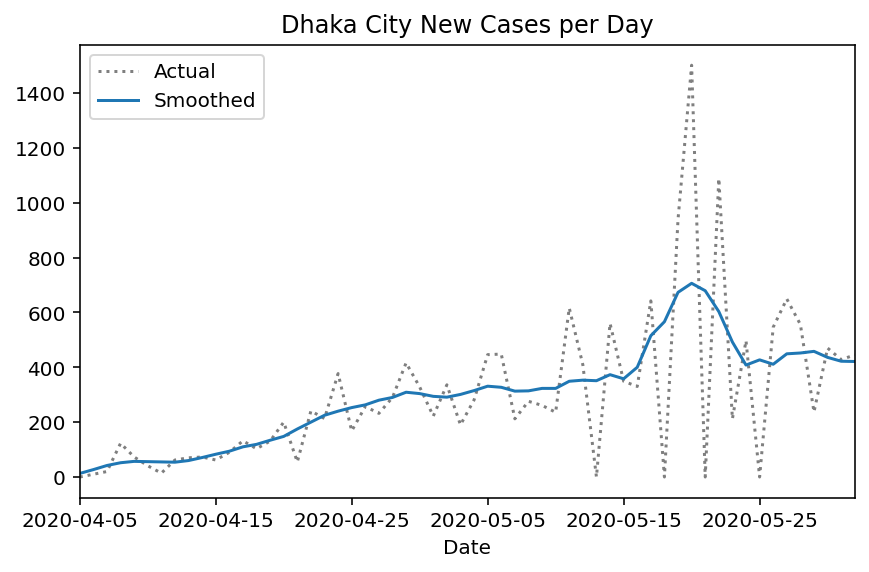

In [15]:
original.plot(title=district_name + " New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(500/72, 300/72))

ax = smoothed.plot(label='Smoothed',
                   legend=True)

ax.get_figure().set_facecolor('w')

In [25]:
original

Date
2020-04-05       0.0
2020-04-06      10.0
2020-04-07      20.0
2020-04-08     123.0
2020-04-09      73.0
2020-04-10      41.0
2020-04-11      14.0
2020-04-12      62.0
2020-04-13      70.0
2020-04-14      73.0
2020-04-15      62.0
2020-04-16      90.0
2020-04-17     132.0
2020-04-18     103.0
2020-04-19     131.0
2020-04-20     200.0
2020-04-21      55.0
2020-04-22     241.0
2020-04-23     213.0
2020-04-24     377.0
2020-04-25     168.0
2020-04-26     257.0
2020-04-27     232.0
2020-04-28     290.0
2020-04-29     416.0
2020-04-30     328.0
2020-05-01     222.0
2020-05-02     336.0
2020-05-03     190.0
2020-05-04     281.0
2020-05-05     446.0
2020-05-06     448.0
2020-05-07     212.0
2020-05-08     276.0
2020-05-09     261.0
2020-05-10     236.0
2020-05-11     616.0
2020-05-12     409.0
2020-05-13       0.0
2020-05-14     560.0
2020-05-15     349.0
2020-05-16     330.0
2020-05-17     642.0
2020-05-18       0.0
2020-05-19     939.0
2020-05-20    1501.0
2020-05-21       0.0
2020-05-

In [16]:
smoothed

Date
2020-04-05     13.0
2020-04-06     27.0
2020-04-07     42.0
2020-04-08     52.0
2020-04-09     57.0
2020-04-10     56.0
2020-04-11     55.0
2020-04-12     54.0
2020-04-13     60.0
2020-04-14     71.0
2020-04-15     83.0
2020-04-16     94.0
2020-04-17    110.0
2020-04-18    119.0
2020-04-19    134.0
2020-04-20    148.0
2020-04-21    175.0
2020-04-22    200.0
2020-04-23    225.0
2020-04-24    240.0
2020-04-25    253.0
2020-04-26    263.0
2020-04-27    280.0
2020-04-28    290.0
2020-04-29    309.0
2020-04-30    304.0
2020-05-01    294.0
2020-05-02    291.0
2020-05-03    301.0
2020-05-04    315.0
2020-05-05    331.0
2020-05-06    327.0
2020-05-07    313.0
2020-05-08    314.0
2020-05-09    323.0
2020-05-10    323.0
2020-05-11    349.0
2020-05-12    353.0
2020-05-13    351.0
2020-05-14    373.0
2020-05-15    358.0
2020-05-16    400.0
2020-05-17    515.0
2020-05-18    566.0
2020-05-19    673.0
2020-05-20    706.0
2020-05-21    679.0
2020-05-22    603.0
2020-05-23    492.0
2020-05-24    4

In [17]:
#hide_input

# We create an array for every possible value of Rt
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article
# https://www.nejm.org/doi/full/10.1056/NEJMoa2001316
GAMMA = 1/7

In [18]:
#hide_input
def get_posteriors(sr, sigma=0.15):

    # (1) Calculate Lambda
    # Map Rt into lambda so we can substitute it into the equation below
    # Note that we have N-1 lambdas because on the first day of an outbreak
    # you do not know what to expect.
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    
    # (2) Calculate each day's likelihood
    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])
    
    # (3) Create the Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None]) 

    # (3a) Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)
    
    # (4) Calculate the initial prior
    #prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 = np.ones_like(r_t_range)/len(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )
    
    # We said we'd keep track of the sum of the log of the probability
    # of the data for maximum likelihood calculation.
    log_likelihood = 0.0

    # (5) Iteratively apply Bayes' rule
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        #(5a) Calculate the new prior
        current_prior = np.dot(process_matrix, posteriors[previous_day])
        
        #(5b) Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior
        
        #(5c) Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)
        
        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator
        
        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)
    
    return posteriors, log_likelihood

# Note that we're fixing sigma to a value just for the example
posteriors, log_likelihood = get_posteriors(smoothed, sigma=.25)

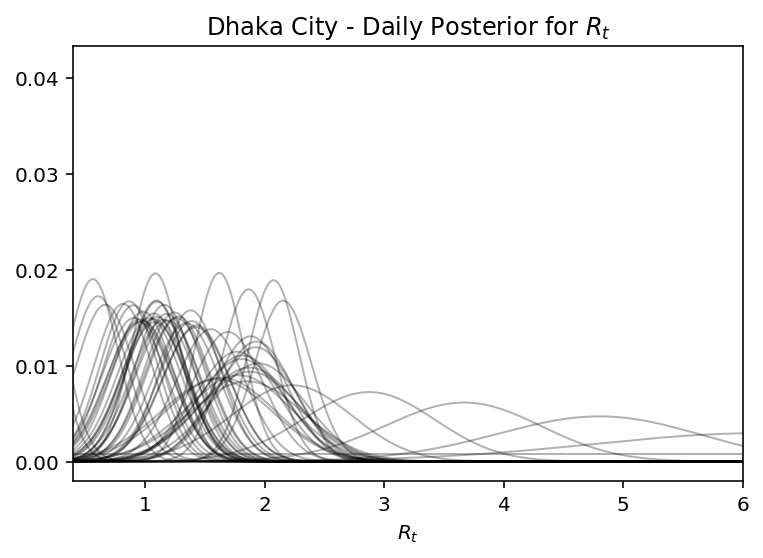

In [19]:
ax = posteriors.plot(title=district_name + ' - Daily Posterior for $R_t$',
           legend=False, 
           lw=1,
           c='k',
           alpha=.3,
           xlim=(0.4,6))

ax.set_xlabel('$R_t$');

In [20]:
posteriors

Date,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01
0.00,0.000833,8.000403e-07,9.344643e-09,7.923115e-09,4.338491e-08,9.485392e-07,7.449926e-06,3.265479e-05,2.086506e-05,4.404219e-06,...,0.031278,0.041196,0.000468,0.000421,3.087758e-07,6.165961e-07,5.869910e-07,0.000028,0.000068,0.000024
0.01,0.000833,8.401808e-07,9.968979e-09,8.519284e-09,4.689995e-08,1.023377e-06,8.009042e-06,3.493360e-05,2.243454e-05,4.785983e-06,...,0.031453,0.040848,0.000528,0.000469,3.711271e-07,7.391820e-07,7.049681e-07,0.000032,0.000077,0.000027
0.02,0.000833,8.813855e-07,1.062577e-08,9.154698e-09,5.067797e-08,1.103679e-06,8.606021e-06,3.735063e-05,2.410680e-05,5.197624e-06,...,0.031564,0.040413,0.000594,0.000523,4.453590e-07,8.847618e-07,8.453196e-07,0.000037,0.000088,0.000031
0.03,0.000833,9.236299e-07,1.131616e-08,9.831673e-09,5.473773e-08,1.189826e-06,9.243216e-06,3.991322e-05,2.588771e-05,5.641262e-06,...,0.031612,0.039894,0.000667,0.000581,5.335905e-07,1.057365e-06,1.012010e-06,0.000043,0.000100,0.000036
0.04,0.000833,9.668870e-07,1.204135e-08,1.055266e-08,5.909932e-08,1.282220e-06,9.923121e-06,4.262906e-05,2.778342e-05,6.119156e-06,...,0.031596,0.039295,0.000748,0.000644,6.382898e-07,1.261670e-06,1.209653e-06,0.000049,0.000114,0.000041
0.05,0.000833,1.011128e-06,1.280255e-08,1.132027e-08,6.378427e-08,1.381292e-06,1.064837e-05,4.550623e-05,2.980039e-05,6.633709e-06,...,0.031515,0.038620,0.000836,0.000714,7.623274e-07,1.503103e-06,1.443602e-06,0.000057,0.000129,0.000047
0.06,0.000833,1.056322e-06,1.360100e-08,1.213724e-08,6.881564e-08,1.487501e-06,1.142175e-05,4.855315e-05,3.194544e-05,7.187480e-06,...,0.031372,0.037873,0.000934,0.000789,9.090349e-07,1.787939e-06,1.720064e-06,0.000065,0.000146,0.000054
0.07,0.000833,1.102436e-06,1.443798e-08,1.300649e-08,7.421810e-08,1.601336e-06,1.224622e-05,5.177868e-05,3.422569e-05,7.783194e-06,...,0.031166,0.037058,0.001040,0.000871,1.082272e-06,2.123423e-06,2.046213e-06,0.000074,0.000165,0.000062
0.08,0.000833,1.149436e-06,1.531481e-08,1.393113e-08,8.001810e-08,1.723321e-06,1.312488e-05,5.519205e-05,3.664865e-05,8.423747e-06,...,0.030899,0.036182,0.001156,0.000960,1.286504e-06,2.517907e-06,2.430332e-06,0.000085,0.000186,0.000071
0.09,0.000833,1.197288e-06,1.623284e-08,1.491441e-08,8.624393e-08,1.854009e-06,1.406103e-05,5.880295e-05,3.922218e-05,9.112219e-06,...,0.030572,0.035248,0.001282,0.001056,1.526883e-06,2.980995e-06,2.881961e-06,0.000097,0.000210,0.000080


In [21]:
#hide_input
# MLE to find sigma
sigmas = np.linspace(1/20, 1, 20)

new, smoothed = prepare_cases(dataSeries, cutoff=25)
if len(smoothed) == 0:
    new, smoothed = prepare_cases(dataSeries, cutoff=10)

result = {}

# Holds all posteriors with every given value of sigma
result['posteriors'] = []

# Holds the log likelihood across all k for each value of sigma
result['log_likelihoods'] = []

for sigma in sigmas:
    posteriors, log_likelihood = get_posteriors(smoothed, sigma=sigma)
    result['posteriors'].append(posteriors)
    result['log_likelihoods'].append(log_likelihood)

clear_output(wait=True)
sigma = sigmas[np.argmax(result['log_likelihoods'])]
posteriors = result['posteriors'][np.argmax(result['log_likelihoods'])]
logging.debug("Sigma: {sigma} has highest log likelihood")
logging.debug('Done.')

In [22]:
#hide_input
# Calculate High density interval
def highest_density_interval(pmf, p=.9, debug=False):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf],
                            index=pmf.columns)
    
    cumsum = np.cumsum(pmf.values)
    
    # N x N matrix of total probability mass for each low, high
    total_p = cumsum - cumsum[:, None]
    
    # Return all indices with total_p > p
    lows, highs = (total_p > p).nonzero()
    
    # Find the smallest range (highest density)
    best = (highs - lows).argmin()
    
    low = pmf.index[lows[best]]
    high = pmf.index[highs[best]]
    
    return pd.Series([low, high],
                     index=['Low_90',
                            'High_90'])



# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors, p=.9)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)


In [23]:
result

,ML,Low_90,High_90
Date,,,
2020-04-06,0.00,0.00,10.81
2020-04-07,4.09,2.18,5.75
2020-04-08,3.13,1.82,4.25
2020-04-09,2.45,1.39,3.39
2020-04-10,1.85,0.86,2.69
2020-04-11,1.51,0.57,2.33
2020-04-12,1.30,0.39,2.11
2020-04-13,1.44,0.55,2.27
2020-04-14,1.70,0.80,2.48


/Users/ruhulsbu/anaconda3/lib/python3.6/site-packages/pandas/tseries/converter.py:48: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


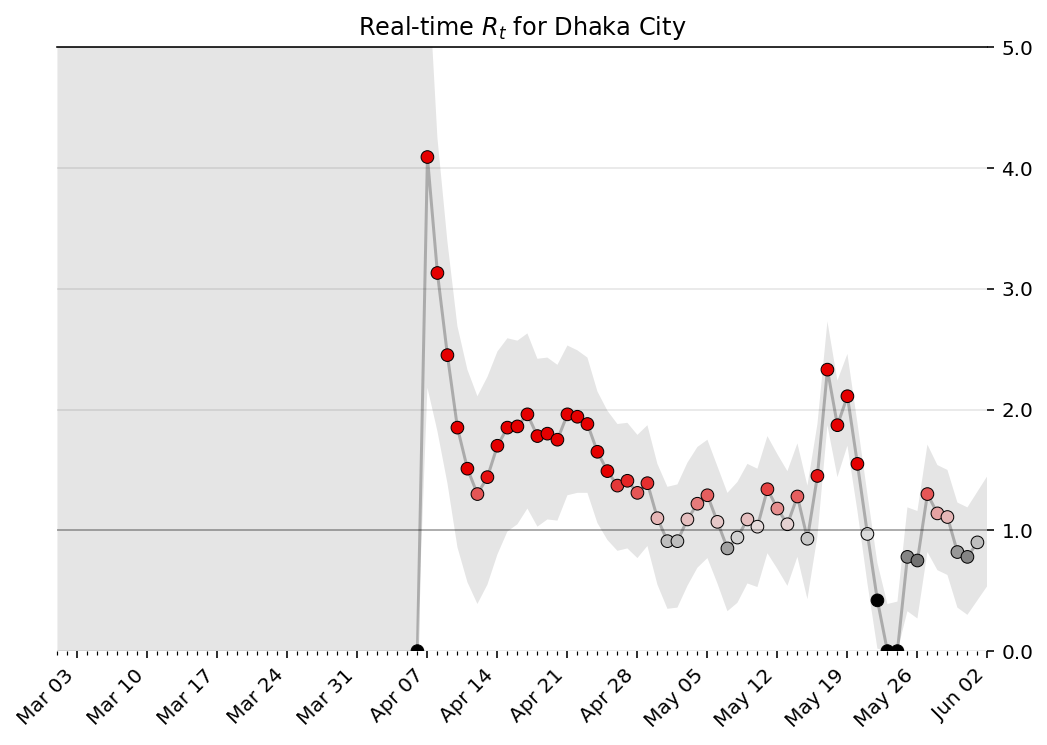

In [24]:
#hide_input
def plot_rt(result, ax, district_name):
    
    ax.set_title(str(district_name))
    
    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5
    
    index = result['ML'].index.get_level_values('Date')
    index = index.to_datetime()
    values = result['ML'].values
    #print(index)
    
    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)
    #"""
    # Aesthetically, extrapolate credible interval by 1 day either side
    lowfn = interp1d(date2num(index.to_datetime()),
                     result['Low_90'].values,
                     bounds_error=False,
                     fill_value='extrapolate')
    
    highfn = interp1d(date2num(index.to_datetime()),
                      result['High_90'].values,
                      bounds_error=False,
                      fill_value='extrapolate')
    
    extended = pd.date_range(start=pd.Timestamp('2020-03-01'),
                             end=index[-1]+pd.Timedelta(days=1))
    
    ax.fill_between(extended,
                    lowfn(date2num(extended)),
                    highfn(date2num(extended)),
                    color='k',
                    alpha=.1,
                    lw=0,
                    zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25);
    
    # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(0.0, 5.0)
    ax.set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp(result.index.get_level_values('Date')[-1])+pd.Timedelta(days=1))
    #"""
    fig.set_facecolor('w')
    fig.savefig('bangladesh-rt.png')  

fig, ax = plt.subplots(figsize=(600/72,400/72))
#result.index = pd.to_datetime(result.index)

plot_rt(result, ax, district_name)
_ = plt.xticks(rotation=45, ha='right')
#_ = plt.xticks(np.arange(0, len(dates), step=3))
ax.set_title('Real-time $R_t$ for ' + district_name)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


# Growth and Doubling Time

In [181]:
MIN_CASES = 100
MAX_CASES = 100000
MAX_DAYS = 100
PLOT_TYPE = 'confirmed cases'

In [182]:
def make_bar_plot(district = "Bangladesh"):
    # Extract the Series corresponding to the case numbers for district.
    c_df = pd.Series(datasetxl[district_name].values, index=datasetxl['Date'])
    
    #c_df = df2.loc[district, df2.columns[3:]].astype(int)
    # Convert index to a proper datetime object
    c_df.index = pd.to_datetime(c_df.index)
    c_df = c_df[c_df >= MIN_CASES]

    n = len(c_df)
    if n == 0:
        print('Too few data to plot: minimum number of {}s is {}'
                .format(PLOT_TYPE, MIN_CASES))
        sys.exit(1)

    fig = plt.Figure()
    fig = plt.Figure()

    # Arrange the subplots on a grid: the top plot (case number change) is
    # one quarter the height of the bar chart (total confirmed case numbers).
    ax2 = plt.subplot2grid((4,1), (0,0))
    ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)
    ax1.bar(range(n), c_df.values)
    # Force the x-axis to be in integers (whole number of days) in case
    # Matplotlib chooses some non-integral number of days to label).
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    c_df_change = c_df.diff()
    ax2.bar(range(n), c_df_change.values)
    ax2.set_xticks([])

    ax1.set_xlabel('Days since {} {}'.format(MIN_CASES, PLOT_TYPE))
    ax1.set_ylabel(f'Number of {PLOT_TYPE}, $N$')
    ax2.set_ylabel('$\Delta N$')

    # Add a title reporting the latest number of cases available.
    title = '{}\n{} {} on {}'.format(district, c_df[-1], PLOT_TYPE,
                c_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)

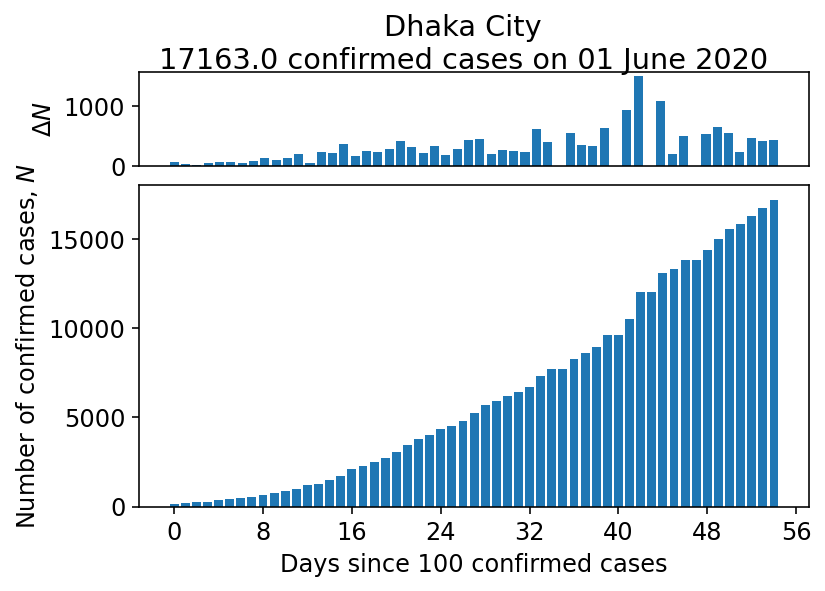

In [183]:
make_bar_plot('Dhaka City')
plt.show()

In [224]:
def make_comparison_plot(district_names, normalize=False):
    # Extract the Series corresponding to the case numbers for district_name.
    #pd.Series(datasetxl[district_name].values, index=datasetxl['Date'])
    #original, smoothed = prepare_cases(dataSeries)
    
    # Plot the data.
    fig = plt.figure()
    ax = fig.add_subplot()
    
    for district in district_names:
    
        c_df = pd.Series(datasetxl[district].values, index=datasetxl['Date'])
        # Discard any columns with fewer than MIN_CASES.
        c_df = c_df[c_df >= MIN_CASES]
        if normalize:
            # Calculate confirmed case numbers per 1,000,000 population.
            c_df  = c_df.div(populations.loc[district], axis='index') * 1000000

        # Rearrange DataFrame to give district_name in columns and number of days since
        # MIN_CASES in rows.
        #c_df = c_df.T.apply(lambda e: pd.Series(e.dropna().values))

        # Truncate the DataFrame after the maximum number of days to be considered.
        #c_df = c_df.truncate(before=15)
        #print(c_df.head)

        #for district, ser in c_df.iteritems():
            #print(district, ser)
            #ax.plot(range(len(ser)), np.log10(ser.values), label=district)
        ax.plot(range(len(c_df.index)), np.log10(c_df.values), label=district)

    if not normalize:
        # Set the tick marks and labels for the absolute data.
        ymin = int(np.log10(MIN_CASES))
        ymax = int(np.log10(np.nanmax(c_df))) + 1
        yticks = np.linspace(ymin, ymax, ymax-ymin+1, dtype=int)
        yticklabels = [str(10**y) for y in yticks]
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels)
        ax.set_ylim(ymin, ymax)
        ax.set_ylabel('Number of ' + str(PLOT_TYPE))
    else:
        # Set the tick marks and labels for the per 1,000,000 population data.
        ax.set_ylim(np.log10(np.nanmin(c_df)), np.log10(np.nanmax(c_df)))
        ax.set_ylabel('Number of' + str(PLOT_TYPE) + ' per 1,000,000 population')

    # Label the x-axis
    ax.set_xlim(0, MAX_DAYS)
    ax.set_xlabel('Number of days since first ' + str(MIN_CASES) + ' ' + str(PLOT_TYPE))
    #ax.set_xlabel('Number of days since first ' + str(MIN_CASES) + ' ' + str(PLOT_TYPE))

    ax.set_ylim(2, np.log10(MAX_CASES))

    def plot_threshold_lines(doubling_lifetime):
        """Add a line for the growth in numbers at a given doubling lifetime."""

        # Find the limits of the line for the current plot region.
        x = np.array([0, MAX_DAYS])
        y = np.log10(MIN_CASES) + x/doubling_lifetime * np.log10(2)
        ymin, ymax = ax.get_ylim()
        if y[1] > ymax:
            y[1] = ymax
            x[1] = doubling_lifetime/np.log10(2) * (y[1] - np.log10(MIN_CASES))
        ax.plot(x, y, ls='--', color='#aaaaaa')

        # The reason this matters is that we want to label the line at its
        # centre, rotated appropriately.
        s = 'Doubling every ' + str(doubling_lifetime) + ' days'
        p1 = ax.transData.transform_point((x[0], y[0]))
        p2 = ax.transData.transform_point((x[1], y[1]))
        xylabel = ((x[0]+x[1])/2, (y[0]+y[1])/2)

        dy = (p2[1] - p1[1])
        dx = (p2[0] - p1[0])
        angle = np.degrees(np.arctan2(dy, dx))
        ax.annotate(s, xy=xylabel, ha='center', va='center', rotation=angle)

    if not normalize:
        # If we're plotting absolute numbers, indicate the doubling time.
        plot_threshold_lines(2)
        plot_threshold_lines(3)
        plot_threshold_lines(5)
        plot_threshold_lines(10)

    ax.legend()

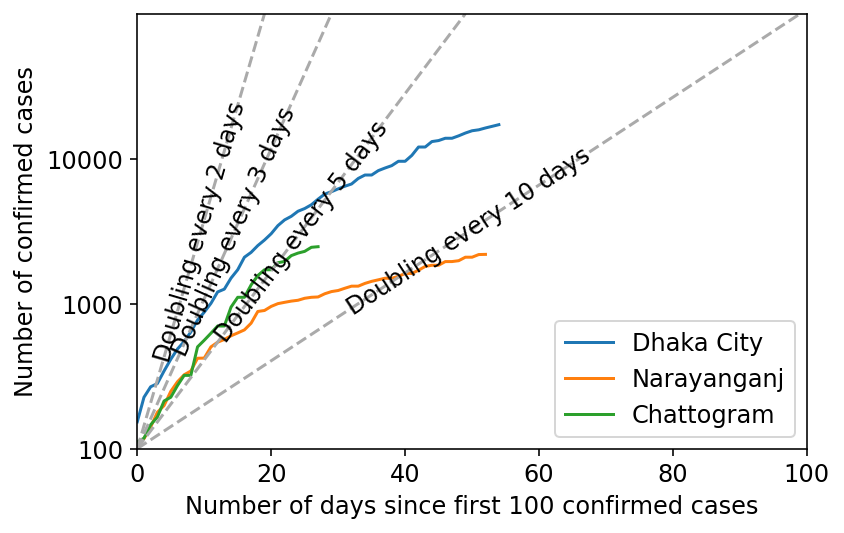

In [225]:
district_names = ["Dhaka City", "Narayanganj", "Chattogram"]
#countries = ['Italy', 'Spain', 'United Kingdom', 'United States',
#             'Japan', 'France', 'South Korea', 'China', 'Austria', 'Iran']
make_comparison_plot(district_names, normalize=False)
plt.show()

In [206]:
original, smoothed = prepare_cases(dataSeries)
smoothed

Date
2020-04-05     13.0
2020-04-06     27.0
2020-04-07     42.0
2020-04-08     52.0
2020-04-09     57.0
2020-04-10     56.0
2020-04-11     55.0
2020-04-12     54.0
2020-04-13     60.0
2020-04-14     71.0
2020-04-15     83.0
2020-04-16     94.0
2020-04-17    110.0
2020-04-18    119.0
2020-04-19    134.0
2020-04-20    148.0
2020-04-21    175.0
2020-04-22    200.0
2020-04-23    225.0
2020-04-24    240.0
2020-04-25    253.0
2020-04-26    263.0
2020-04-27    280.0
2020-04-28    290.0
2020-04-29    309.0
2020-04-30    304.0
2020-05-01    294.0
2020-05-02    291.0
2020-05-03    301.0
2020-05-04    315.0
2020-05-05    331.0
2020-05-06    327.0
2020-05-07    313.0
2020-05-08    314.0
2020-05-09    323.0
2020-05-10    323.0
2020-05-11    349.0
2020-05-12    353.0
2020-05-13    351.0
2020-05-14    373.0
2020-05-15    358.0
2020-05-16    400.0
2020-05-17    515.0
2020-05-18    566.0
2020-05-19    673.0
2020-05-20    706.0
2020-05-21    679.0
2020-05-22    603.0
2020-05-23    492.0
2020-05-24    4

In [207]:
#original = pd.Series(datasetxl[district_name].values, index=datasetxl['Date'])
original = pd.Series(smoothed.get_values(), index=smoothed.index)
original

Date
2020-04-05     13.0
2020-04-06     27.0
2020-04-07     42.0
2020-04-08     52.0
2020-04-09     57.0
2020-04-10     56.0
2020-04-11     55.0
2020-04-12     54.0
2020-04-13     60.0
2020-04-14     71.0
2020-04-15     83.0
2020-04-16     94.0
2020-04-17    110.0
2020-04-18    119.0
2020-04-19    134.0
2020-04-20    148.0
2020-04-21    175.0
2020-04-22    200.0
2020-04-23    225.0
2020-04-24    240.0
2020-04-25    253.0
2020-04-26    263.0
2020-04-27    280.0
2020-04-28    290.0
2020-04-29    309.0
2020-04-30    304.0
2020-05-01    294.0
2020-05-02    291.0
2020-05-03    301.0
2020-05-04    315.0
2020-05-05    331.0
2020-05-06    327.0
2020-05-07    313.0
2020-05-08    314.0
2020-05-09    323.0
2020-05-10    323.0
2020-05-11    349.0
2020-05-12    353.0
2020-05-13    351.0
2020-05-14    373.0
2020-05-15    358.0
2020-05-16    400.0
2020-05-17    515.0
2020-05-18    566.0
2020-05-19    673.0
2020-05-20    706.0
2020-05-21    679.0
2020-05-22    603.0
2020-05-23    492.0
2020-05-24    4

In [208]:
# from Worldometer, arcived at
# http://web.archive.org/web/20200422135436/https://www.worldometers.info/coronavirus/
district_name = "Dhaka City"
date = original.index.get_values()
cases = original.get_values()
#print(date, cases)

allcases = [[date[0], cases[0], 0, 0]]
for i in range(1, len(date)):
    print(allcases[-1])
    allcases.append([date[i], allcases[-1][1] + cases[i], 0, 0])
#allcases = [[date[i], cases[i]+allcases[-1], 0, 0] for i in range(1, len(date))]

['2020-04-05', 13.0, 0, 0]
['2020-04-06', 40.0, 0, 0]
['2020-04-07', 82.0, 0, 0]
['2020-04-08', 134.0, 0, 0]
['2020-04-09', 191.0, 0, 0]
['2020-04-10', 247.0, 0, 0]
['2020-04-11', 302.0, 0, 0]
['2020-04-12', 356.0, 0, 0]
['2020-04-13', 416.0, 0, 0]
['2020-04-14', 487.0, 0, 0]
['2020-04-15', 570.0, 0, 0]
['2020-04-16', 664.0, 0, 0]
['2020-04-17', 774.0, 0, 0]
['2020-04-18', 893.0, 0, 0]
['2020-04-19', 1027.0, 0, 0]
['2020-04-20', 1175.0, 0, 0]
['2020-04-21', 1350.0, 0, 0]
['2020-04-22', 1550.0, 0, 0]
['2020-04-23', 1775.0, 0, 0]
['2020-04-24', 2015.0, 0, 0]
['2020-04-25', 2268.0, 0, 0]
['2020-04-26', 2531.0, 0, 0]
['2020-04-27', 2811.0, 0, 0]
['2020-04-28', 3101.0, 0, 0]
['2020-04-29', 3410.0, 0, 0]
['2020-04-30', 3714.0, 0, 0]
['2020-05-01', 4008.0, 0, 0]
['2020-05-02', 4299.0, 0, 0]
['2020-05-03', 4600.0, 0, 0]
['2020-05-04', 4915.0, 0, 0]
['2020-05-05', 5246.0, 0, 0]
['2020-05-06', 5573.0, 0, 0]
['2020-05-07', 5886.0, 0, 0]
['2020-05-08', 6200.0, 0, 0]
['2020-05-09', 6523.0, 0, 0]
['

In [209]:
allcases[0][2] = allcases[1][1]/allcases[0][1]-1
allcases[0][3] = 0.7/allcases[0][2]

print(allcases[0])
print(allcases[1])
print(allcases[2])
print(allcases[-1])


['2020-04-05', 13.0, 2.076923076923077, 0.33703703703703697]
['2020-04-06', 40.0, 0, 0]
['2020-04-07', 82.0, 0, 0]
['2020-06-01', 17148.0, 0, 0]


In [210]:
for i in range(len(allcases)):
    if allcases[i][2] == 0.0:
        allcases[i][2] = allcases[i][1]/allcases[i-1][1]-1
    if allcases[i][3] == 0.0:
        allcases[i][3] = 0.7/allcases[i][2];

        # uncomment to check output
#print(allcases)
#print((allcases[1][2]))

In [229]:
doublingtimes = [row[3] for row in allcases]
dates = [row[0] for row in allcases];

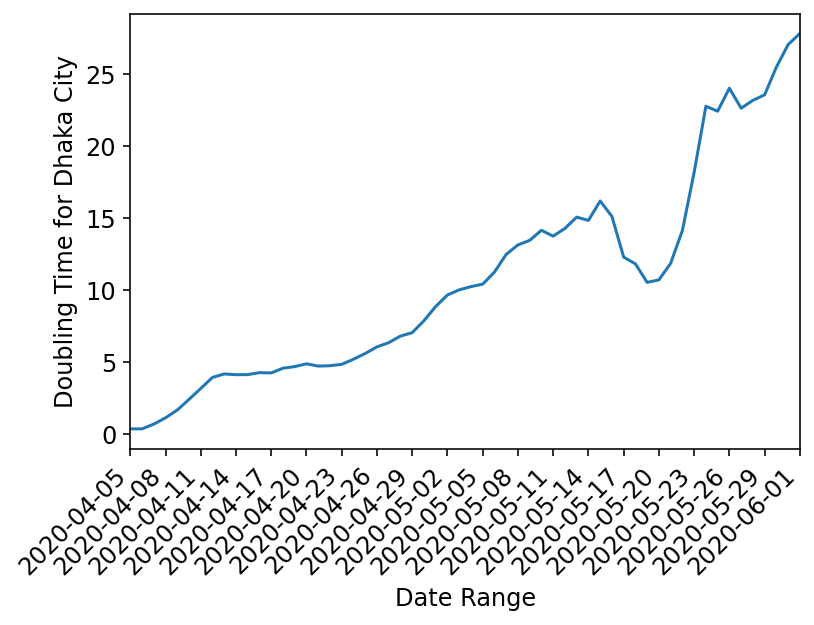

In [230]:
plt.figure(figsize=(6, 4))
plt.autoscale(enable=True, axis='x', tight=True)
plt.rcParams.update({'font.size': 12})
plt.plot(dates, doublingtimes)#, '-', color="#348ABD", label='$Herd Immunity$', lw=4)
plt.xlabel('Date Range')
plt.ylabel('Doubling Time for ' + district_name)
_ = plt.xticks(rotation=45, ha='right')
_ = plt.xticks(np.arange(0, len(dates), step=3))

# uncomment and adjust path to save PDF
# plt.savefig("/Users/philip/Desktop/doublingtime.pdf", bbox_inches='tight');

In [213]:
allcases

[['2020-04-05', 13.0, 2.076923076923077, 0.33703703703703697],
 ['2020-04-06', 40.0, 2.076923076923077, 0.33703703703703697],
 ['2020-04-07', 82.0, 1.0499999999999998, 0.6666666666666667],
 ['2020-04-08', 134.0, 0.6341463414634145, 1.103846153846154],
 ['2020-04-09', 191.0, 0.4253731343283582, 1.645614035087719],
 ['2020-04-10', 247.0, 0.293193717277487, 2.3874999999999993],
 ['2020-04-11', 302.0, 0.22267206477732793, 3.1436363636363636],
 ['2020-04-12', 356.0, 0.17880794701986757, 3.914814814814814],
 ['2020-04-13', 416.0, 0.1685393258426966, 4.153333333333334],
 ['2020-04-14', 487.0, 0.17067307692307687, 4.101408450704226],
 ['2020-04-15', 570.0, 0.17043121149897322, 4.1072289156626525],
 ['2020-04-16', 664.0, 0.16491228070175445, 4.244680851063828],
 ['2020-04-17', 774.0, 0.1656626506024097, 4.225454545454544],
 ['2020-04-18', 893.0, 0.1537467700258397, 4.552941176470591],
 ['2020-04-19', 1027.0, 0.1500559910414334, 4.664925373134327],
 ['2020-04-20', 1175.0, 0.14410905550146058, 4.

In [214]:
doublingtimes = [row[2] for row in allcases]
dates = [row[0] for row in allcases];

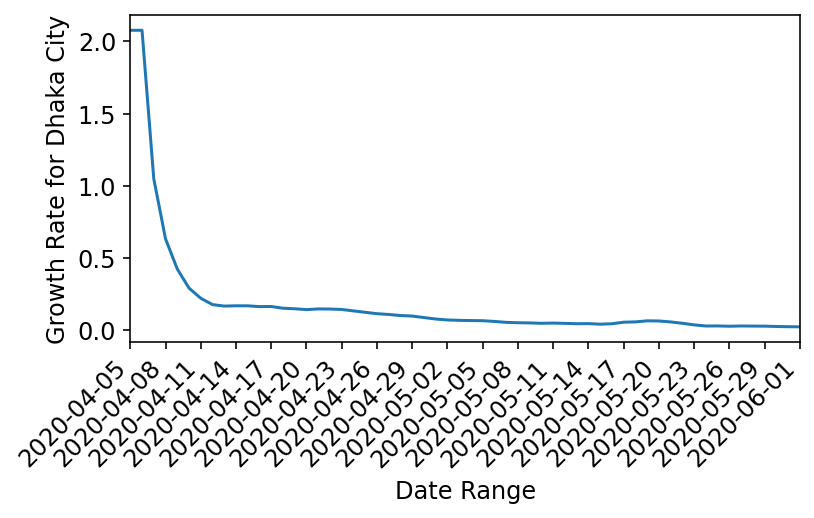

In [226]:
plt.figure(figsize=(6, 3))
plt.autoscale(enable=True, axis='x', tight=True)
plt.rcParams.update({'font.size': 12})
plt.plot(dates, doublingtimes)#, '-', color="#348ABD", label='$Herd Immunity$', lw=4)
plt.xlabel('Date Range')
plt.ylabel('Growth Rate for ' + district_name)
_ = plt.xticks(rotation=45, ha='right')
_ = plt.xticks(np.arange(0, len(dates), step=3))

# uncomment and adjust path to save PDF
# plt.savefig("/Users/philip/Desktop/doublingtime.pdf", bbox_inches='tight');